In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [4]:
# Identify all duplicate cases using prof. - 369 casos
# Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the data set to include one observation for each instructor with a total of observations restricted to 94.
ratings_df.duplicated(subset='prof').sum()

369

In [5]:
ratings_df.columns

Index(['minority', 'age', 'gender', 'credits', 'beauty', 'eval', 'division',
       'native', 'tenure', 'students', 'allstudents', 'prof', 'PrimaryLast',
       'vismin', 'female', 'single_credit', 'upper_division',
       'English_speaker', 'tenured_prof'],
      dtype='object')

In [6]:
ratings_df['age'].mean(), ratings_df['age'].std()

(48.365010799136066, 9.80274203786482)

In [7]:
no_duplicates_rating_df = ratings_df.drop_duplicates(subset=['prof'])

In [8]:
no_duplicates_rating_df['age'].mean(), no_duplicates_rating_df['age'].std()

(47.5531914893617, 10.25651329515495)

In [9]:
# Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()

<AxesSubplot: xlabel='division', ylabel='eval'>

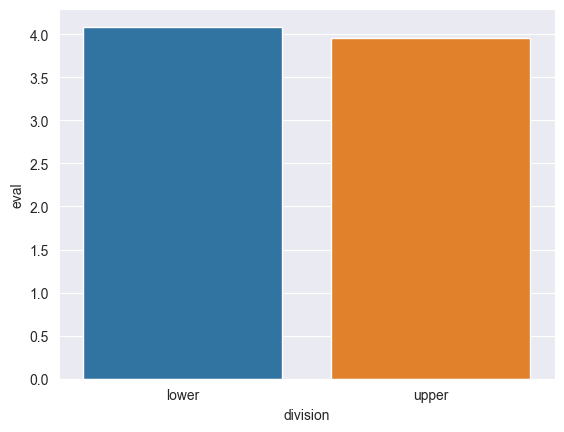

In [10]:
sns.barplot(x='division',  y='eval', data=division_eval)

<AxesSubplot: xlabel='age', ylabel='eval'>

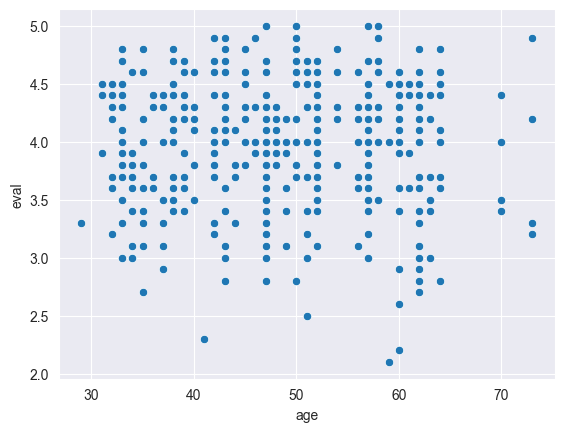

In [11]:
# plot the relationship between age and teaching evaluation scores
sns.scatterplot(x='age', y='eval', data=ratings_df)

<AxesSubplot: xlabel='age', ylabel='eval'>

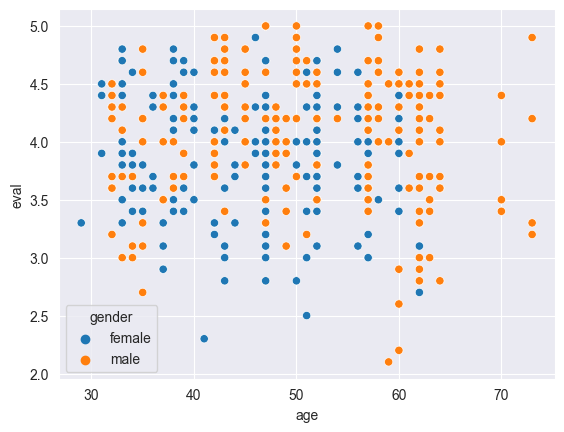

In [12]:
# Plot the relationship between age and teaching evaluation score using gender_differentiated scatter plots
sns.scatterplot(x='age', y='eval', hue='gender', data=ratings_df)

<AxesSubplot: xlabel='credits', ylabel='beauty'>

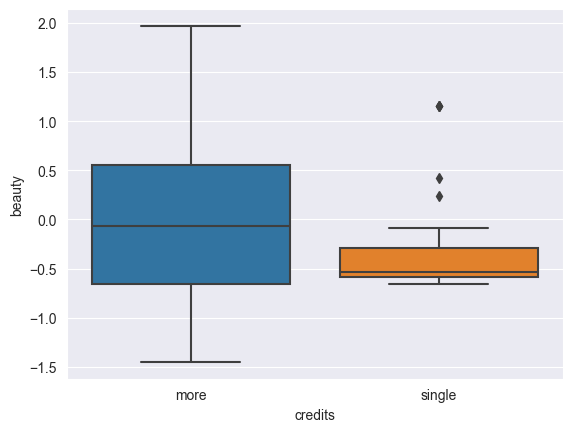

In [13]:
# create a boxplot for beauty scores differentiated by credits
sns.boxplot(data=ratings_df, x='credits', y='beauty' )

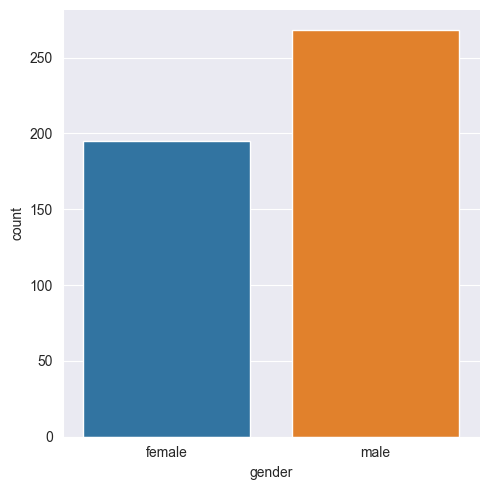

In [14]:
# what is the number of courses taught by gender?
sns.catplot(data=ratings_df, x='gender', kind='count')

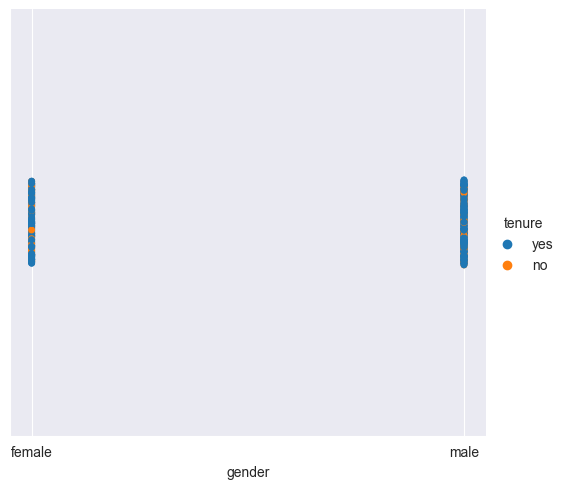

In [15]:
# create a group histogram of taught by gendr and tenure
sns.catplot(data=ratings_df, x='gender', hue='tenure')

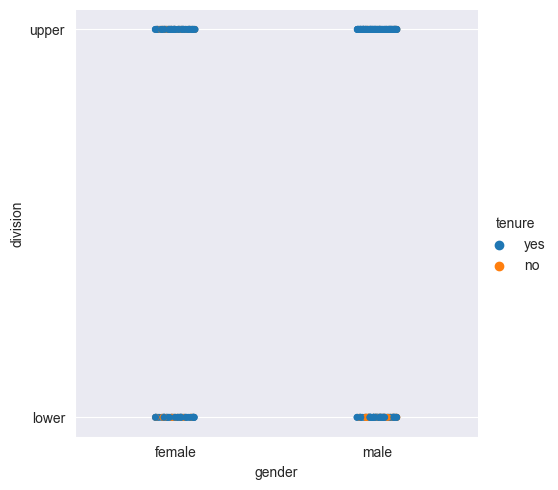

In [16]:
# add division as another factor to the above histogram
sns.catplot(data=ratings_df, x='gender', y='division', hue='tenure')

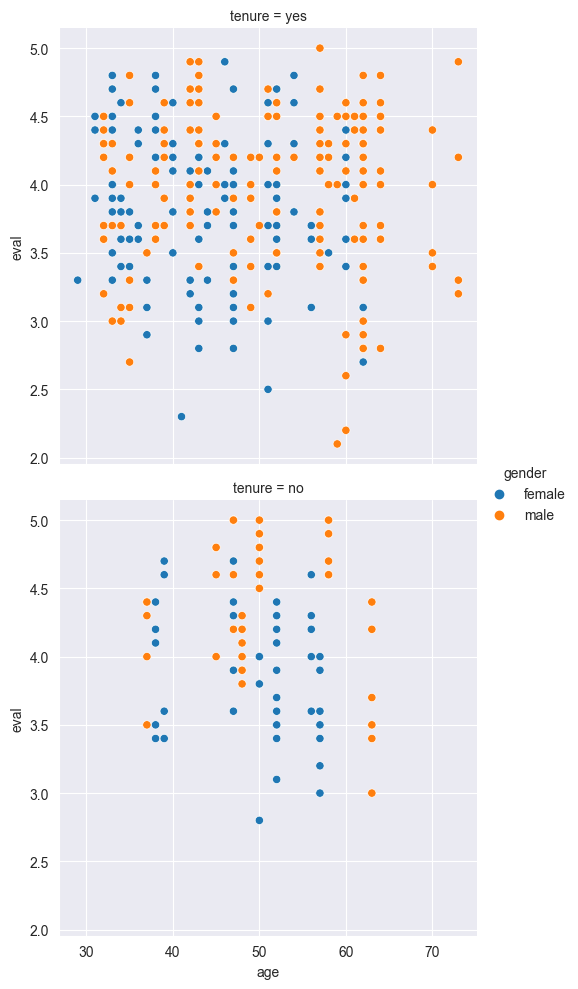

In [17]:
# create a scatterplot of age and evaluation scores, differentiated by gender and tensure
sns.relplot(data=ratings_df, x='age', y='eval', hue='gender', row='tenure')

C:\Users\lorac\AppData\Local\Temp\ipykernel_28168\607577842.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df['eval'], kde=False)


<AxesSubplot: xlabel='eval'>

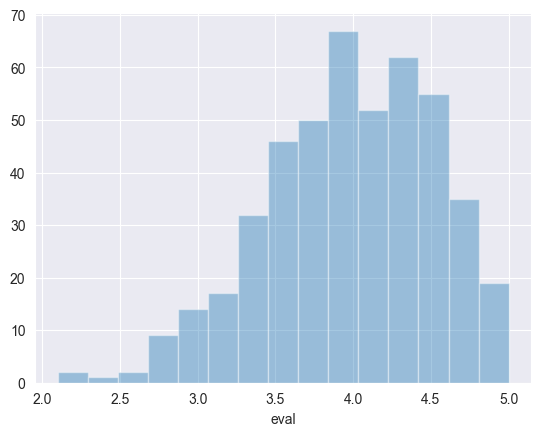

In [18]:
# create a distribution plot of teaching evaluation scores
sns.distplot(ratings_df['eval'], kde=False)

C:\Users\lorac\AppData\Local\Temp\ipykernel_28168\2651929827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False )
C:\Users\lorac\AppData\Local\Temp\ipykernel_28168\2651929827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

<AxesSubplot: xlabel='eval'>

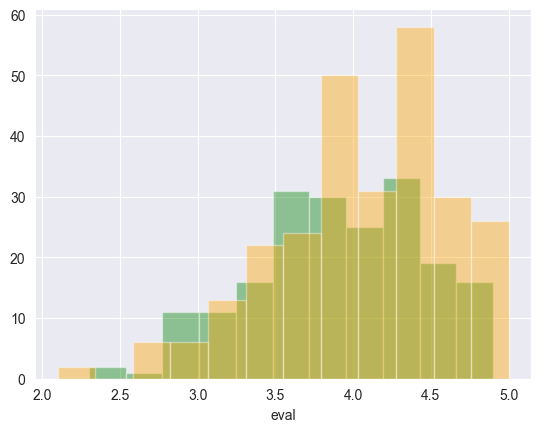

In [19]:
# create a distribution plot of teaching evaluation score with gender as a factor
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False )
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color='orange', kde=False )

<AxesSubplot: xlabel='gender', ylabel='age'>

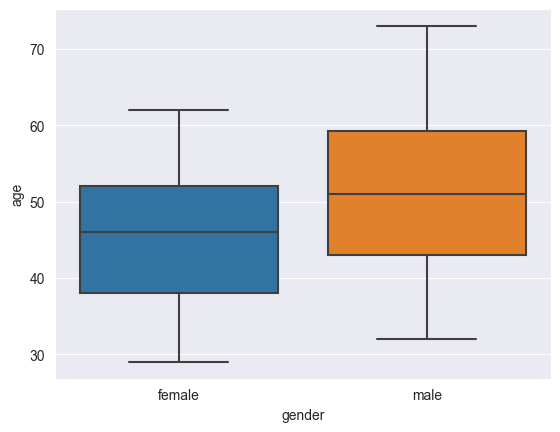

In [20]:
sns.boxplot(x='gender', y='age', data=ratings_df)

C:\Users\lorac\AppData\Local\Temp\ipykernel_28168\70417301.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df[ratings_df['native'] == 'yes']['beauty'], color='blue', kde=False)
C:\Users\lorac\AppData\Local\Temp\ipykernel_28168\70417301.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<AxesSubplot: xlabel='beauty'>

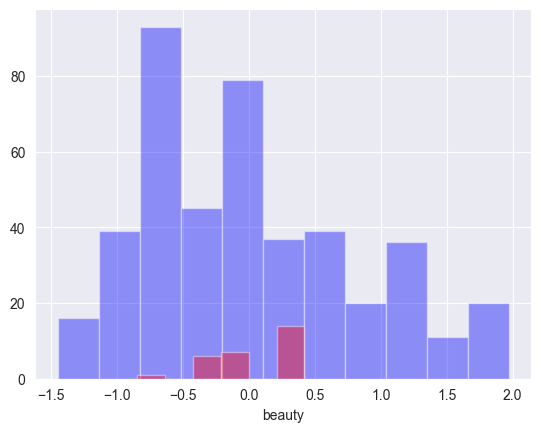

In [21]:
# create a distribution plot of beauty scores with native english speaker as a factor
sns.distplot(ratings_df[ratings_df['native'] == 'yes']['beauty'], color='blue', kde=False)
sns.distplot(ratings_df[ratings_df['native'] == 'no']['beauty'], color='red', kde=False)

<AxesSubplot: xlabel='age', ylabel='minority'>

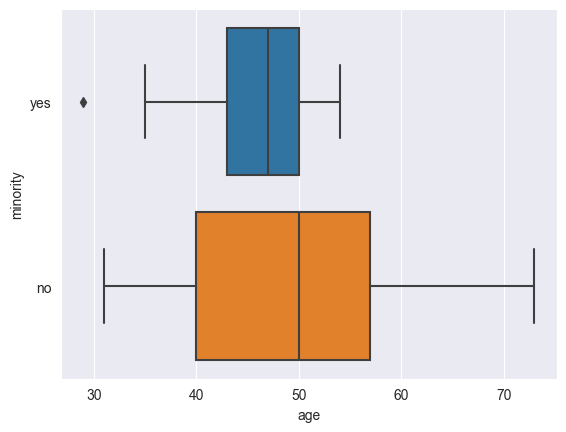

In [22]:
# create a horizontal box plot of the age of the instructors by visible minority
sns.boxplot(data=ratings_df, x='age', y='minority')

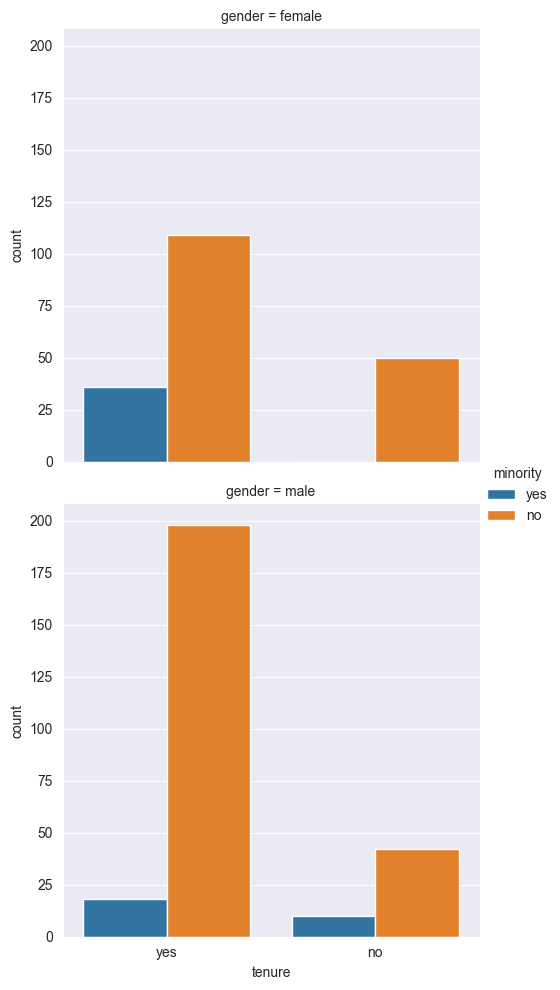

In [23]:
# create a group histogram of tenure by minority and add the gender factor
sns.catplot(data=ratings_df, x='tenure', hue='minority', row='gender', kind='count')

<AxesSubplot: xlabel='age'>

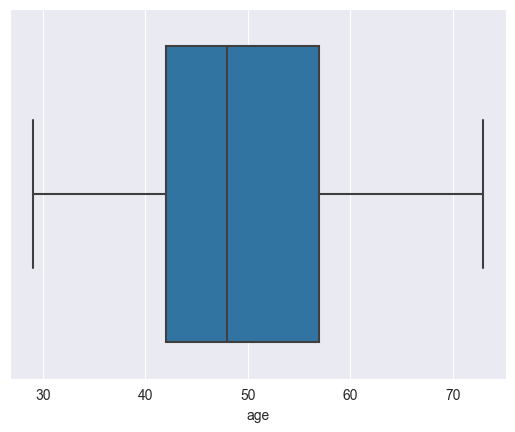

In [24]:
# create a boxplot of the age variable
sns.boxplot(data=ratings_df, x='age')

In [25]:
ratings_df.to_csv('clean_ratings_df', index=False)